<a href="https://colab.research.google.com/github/karimaahdich/deep-learning-lab/blob/main/Classification%20and%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import files

# Sélectionne et importe plusieurs fichiers à la fois
uploaded = files.upload()

Saving prices.csv to prices (1).csv


In [14]:
import pandas as pd
prices = pd.read_csv("prices.csv")

# Vérifions le contenu
print("Prices :")
display(prices.head())

Prices :


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [15]:
import pandas as pd

# Vérification du nombre de lignes et de colonnes
print("Shape du dataset :", prices.shape)

# Informations générales sur les types de données
print("\nInformations générales :")
prices.info()

# Statistiques descriptives
print("\nStatistiques descriptives :")
display(prices.describe())


Shape du dataset : (851264, 7)

Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB

Statistiques descriptives :


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [16]:
# Vérification des valeurs manquantes
missing_values = prices.isnull().sum()
print("Valeurs manquantes :")
print(missing_values)

# Pourcentage de valeurs manquantes
print("\nPourcentage de valeurs manquantes (%) :")
print((missing_values / len(prices)) * 100)


Valeurs manquantes :
date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

Pourcentage de valeurs manquantes (%) :
date      0.0
symbol    0.0
open      0.0
close     0.0
low       0.0
high      0.0
volume    0.0
dtype: float64


In [17]:
# Vérification des doublons
duplicates = prices.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicates}")


Nombre de lignes dupliquées : 0


Statistiques descriptives :


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


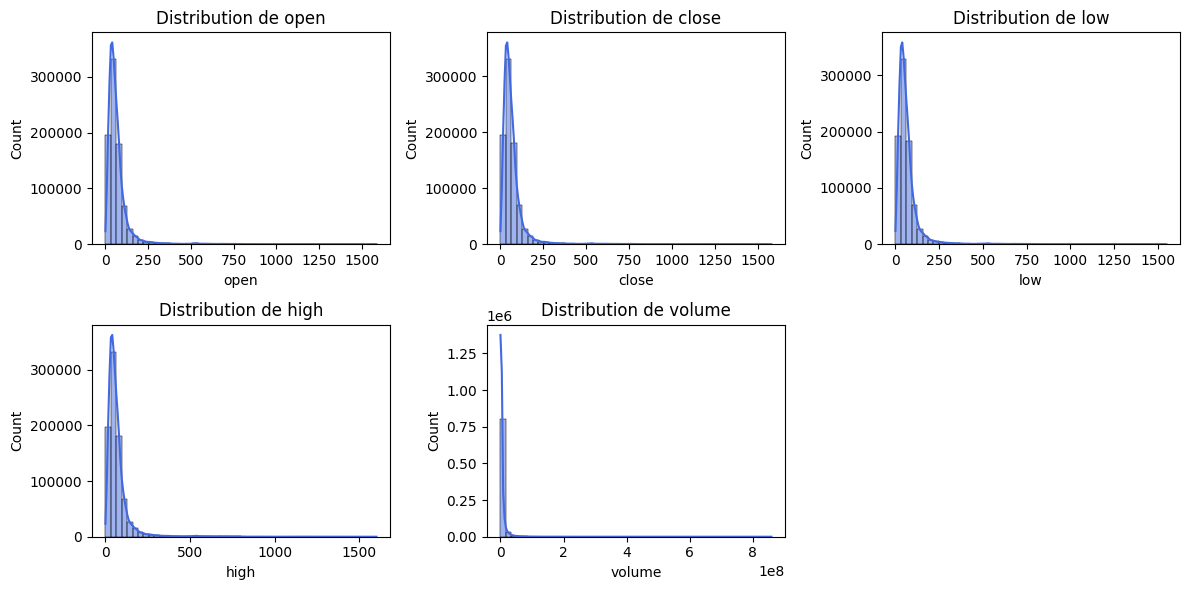

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Statistiques générales
print("Statistiques descriptives :")
display(prices.describe())

# Distribution des variables numériques
numeric_cols = ['open', 'close', 'low', 'high', 'volume']

plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(prices[col], bins=50, kde=True, color='royalblue')
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


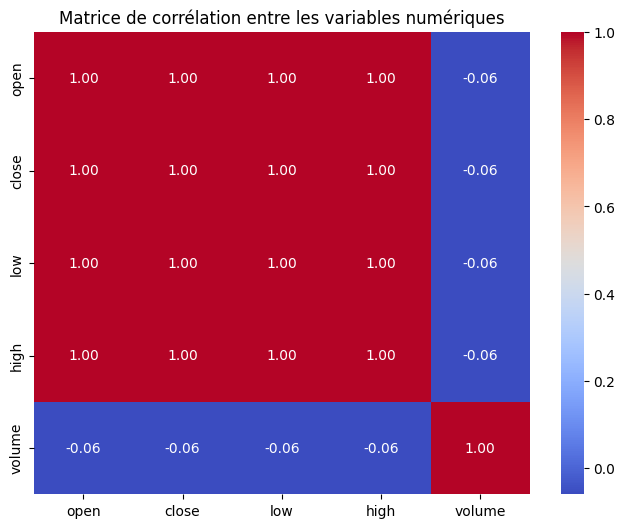

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes numériques
num_cols = ['open', 'close', 'low', 'high', 'volume']

# Calcul de la matrice de corrélation
corr_matrix = prices[num_cols].corr()

# Affichage
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


In [20]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sélection des features (X) et de la target (y)
X = prices[['open', 'high', 'low', 'volume']].values
y = prices['close'].values.reshape(-1, 1)

# Division en données d’entraînement (80 %) et test (20 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisation des données (important pour PyTorch)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)


Taille train : (681011, 4)
Taille test  : (170253, 4)


In [21]:
import torch.nn as nn

# Définition du modèle de régression (DNN)
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 64),     # 4 variables d’entrée
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)      # 1 variable de sortie (close)
        )

    def forward(self, x):
        return self.layers(x)

# Instanciation du modèle
model = RegressionModel()
print(model)


RegressionModel(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [22]:
# Fonction de perte et optimiseur
criterion = nn.MSELoss()  # Erreur quadratique moyenne
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Conversion en tenseurs
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor  = torch.FloatTensor(X_test)
y_test_tensor  = torch.FloatTensor(y_test)

# Entraînement
epochs = 100
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Prédiction sur les données d'entraînement
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Évaluation sur les données de test
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss.item():.6f} | Test Loss: {test_loss.item():.6f}")


Epoch 10/100 | Train Loss: 0.959611 | Test Loss: 0.949196
Epoch 20/100 | Train Loss: 0.873628 | Test Loss: 0.859641
Epoch 30/100 | Train Loss: 0.736444 | Test Loss: 0.715753
Epoch 40/100 | Train Loss: 0.526683 | Test Loss: 0.499703
Epoch 50/100 | Train Loss: 0.259399 | Test Loss: 0.230972
Epoch 60/100 | Train Loss: 0.040726 | Test Loss: 0.029784
Epoch 70/100 | Train Loss: 0.016447 | Test Loss: 0.014925
Epoch 80/100 | Train Loss: 0.003284 | Test Loss: 0.003255
Epoch 90/100 | Train Loss: 0.001423 | Test Loss: 0.001128
Epoch 100/100 | Train Loss: 0.000887 | Test Loss: 0.000757


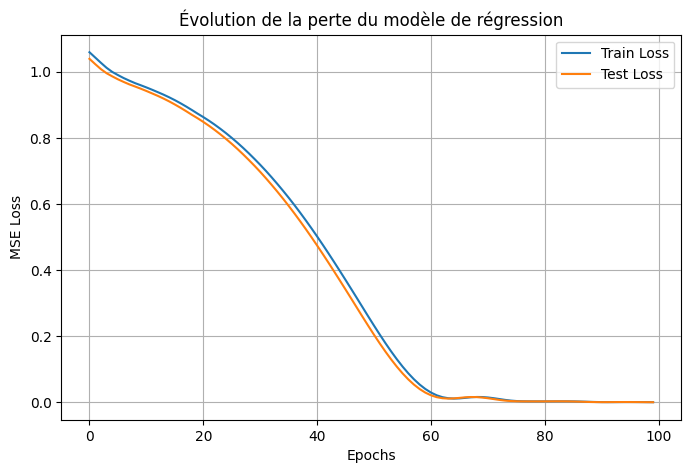

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Évolution de la perte du modèle de régression')
plt.legend()
plt.grid(True)
plt.show()



In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Conversion des données en tenseurs (si pas déjà fait)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Fonction d'entraînement et d'évaluation
def train_and_evaluate(model, optimizer, epochs=50):
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train_tensor)
        loss = criterion(y_pred, y_train_tensor)
        loss.backward()
        optimizer.step()
    # Évaluation sur test
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = criterion(y_test_pred, y_test_tensor).item()
    return test_loss

# Fonction pour créer un modèle dynamique selon l’architecture
def create_model(hidden_layers):
    layers = []
    input_dim = 4
    for h in hidden_layers:
        layers.append(nn.Linear(input_dim, h))
        layers.append(nn.ReLU())
        input_dim = h
    layers.append(nn.Linear(input_dim, 1))
    return nn.Sequential(*layers)

# Grille d’hyperparamètres
learning_rates = [0.01, 0.001, 0.0005]
optimizers = ['adam', 'sgd']
architectures = [[64, 32], [128, 64, 32]]

results = []

for lr in learning_rates:
    for opt in optimizers:
        for arch in architectures:
            model = create_model(arch)
            if opt == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=lr)
            else:
                optimizer = optim.SGD(model.parameters(), lr=lr)

            test_loss = train_and_evaluate(model, optimizer, epochs=50)
            results.append({
                'learning_rate': lr,
                'optimizer': opt,
                'architecture': arch,
                'test_loss': test_loss
            })
            print(f"lr={lr}, opt={opt}, arch={arch} → Test Loss={test_loss:.6f}")

# Résultats triés par performance
results_sorted = sorted(results, key=lambda x: x['test_loss'])
print("\nMeilleurs résultats :")
for r in results_sorted[:5]:
    print(r)


lr=0.01, opt=adam, arch=[64, 32] → Test Loss=0.000844
lr=0.01, opt=adam, arch=[128, 64, 32] → Test Loss=0.000416
lr=0.01, opt=sgd, arch=[64, 32] → Test Loss=0.030974
lr=0.01, opt=sgd, arch=[128, 64, 32] → Test Loss=0.197422
lr=0.001, opt=adam, arch=[64, 32] → Test Loss=0.009052
lr=0.001, opt=adam, arch=[128, 64, 32] → Test Loss=0.004211
lr=0.001, opt=sgd, arch=[64, 32] → Test Loss=0.735539
lr=0.001, opt=sgd, arch=[128, 64, 32] → Test Loss=0.932605
lr=0.0005, opt=adam, arch=[64, 32] → Test Loss=0.212226
lr=0.0005, opt=adam, arch=[128, 64, 32] → Test Loss=0.013245
lr=0.0005, opt=sgd, arch=[64, 32] → Test Loss=0.963167
lr=0.0005, opt=sgd, arch=[128, 64, 32] → Test Loss=0.954006

Meilleurs résultats :
{'learning_rate': 0.01, 'optimizer': 'adam', 'architecture': [128, 64, 32], 'test_loss': 0.00041576309013180435}
{'learning_rate': 0.01, 'optimizer': 'adam', 'architecture': [64, 32], 'test_loss': 0.000844308000523597}
{'learning_rate': 0.001, 'optimizer': 'adam', 'architecture': [128, 64, 32

In [28]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

train_losses, test_losses = [], []
train_r2, test_r2 = [], []

epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)

    # ✅ Calcul R² (corrigé)
    r2_train = r2_score(y_train_tensor.detach().numpy(), y_pred_train.detach().numpy())
    r2_test = r2_score(y_test_tensor.detach().numpy(), y_pred_test.detach().numpy())

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    train_r2.append(r2_train)
    test_r2.append(r2_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss train={loss.item():.6f}, test={test_loss.item():.6f} | R2 train={r2_train:.4f}, test={r2_test:.4f}")


Epoch 10/100 | Loss train=0.007011, test=0.015649 | R2 train=0.9930, test=0.9843
Epoch 20/100 | Loss train=0.006685, test=0.002081 | R2 train=0.9933, test=0.9979
Epoch 30/100 | Loss train=0.002292, test=0.002128 | R2 train=0.9977, test=0.9979
Epoch 40/100 | Loss train=0.001378, test=0.000698 | R2 train=0.9986, test=0.9993
Epoch 50/100 | Loss train=0.000508, test=0.000534 | R2 train=0.9995, test=0.9995
Epoch 60/100 | Loss train=0.000310, test=0.000247 | R2 train=0.9997, test=0.9998
Epoch 70/100 | Loss train=0.000232, test=0.000198 | R2 train=0.9998, test=0.9998
Epoch 80/100 | Loss train=0.000180, test=0.000179 | R2 train=0.9998, test=0.9998
Epoch 90/100 | Loss train=0.000165, test=0.000171 | R2 train=0.9998, test=0.9998
Epoch 100/100 | Loss train=0.000160, test=0.000163 | R2 train=0.9998, test=0.9998


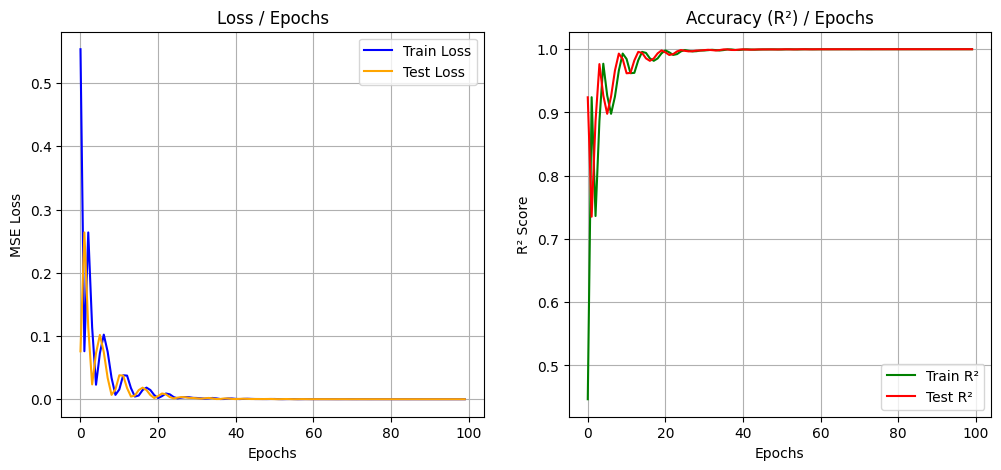

In [29]:
plt.figure(figsize=(12,5))

# --- Graphique 1 : Loss/Epochs ---
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss / Epochs')
plt.legend()
plt.grid(True)

# --- Graphique 2 : Accuracy(Eq=R²)/Epochs ---
plt.subplot(1,2,2)
plt.plot(train_r2, label='Train R²', color='green')
plt.plot(test_r2, label='Test R²', color='red')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Accuracy (R²) / Epochs')
plt.legend()
plt.grid(True)

plt.show()


In [30]:
import torch.nn as nn

class RegularizedModel(nn.Module):
    def __init__(self):
        super(RegularizedModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Instanciation
model_reg = RegularizedModel()
print(model_reg)


RegularizedModel(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [31]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_reg.parameters(), lr=0.01, weight_decay=1e-4)

epochs = 100
train_losses_reg, test_losses_reg, train_r2_reg, test_r2_reg = [], [], [], []

for epoch in range(epochs):
    model_reg.train()
    optimizer.zero_grad()
    y_pred_train = model_reg(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer.step()

    model_reg.eval()
    with torch.no_grad():
        y_pred_test = model_reg(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)

        # R²
        r2_train = r2_score(y_train_tensor.detach().numpy(), y_pred_train.detach().numpy())
        r2_test = r2_score(y_test_tensor.detach().numpy(), y_pred_test.detach().numpy())

    train_losses_reg.append(loss.item())
    test_losses_reg.append(test_loss.item())
    train_r2_reg.append(r2_train)
    test_r2_reg.append(r2_test)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Loss train={loss.item():.6f}, test={test_loss.item():.6f} | R2 train={r2_train:.4f}, test={r2_test:.4f}")


Epoch 10/100 | Loss train=0.050777, test=0.005900 | R2 train=0.9492, test=0.9941
Epoch 20/100 | Loss train=0.019724, test=0.002513 | R2 train=0.9803, test=0.9975
Epoch 30/100 | Loss train=0.020307, test=0.014994 | R2 train=0.9797, test=0.9849
Epoch 40/100 | Loss train=0.016371, test=0.003142 | R2 train=0.9836, test=0.9968
Epoch 50/100 | Loss train=0.015983, test=0.000631 | R2 train=0.9840, test=0.9994
Epoch 60/100 | Loss train=0.014984, test=0.001256 | R2 train=0.9850, test=0.9987
Epoch 70/100 | Loss train=0.014627, test=0.001829 | R2 train=0.9854, test=0.9982
Epoch 80/100 | Loss train=0.013895, test=0.002368 | R2 train=0.9861, test=0.9976
Epoch 90/100 | Loss train=0.013407, test=0.002998 | R2 train=0.9866, test=0.9970
Epoch 100/100 | Loss train=0.013296, test=0.004244 | R2 train=0.9867, test=0.9957


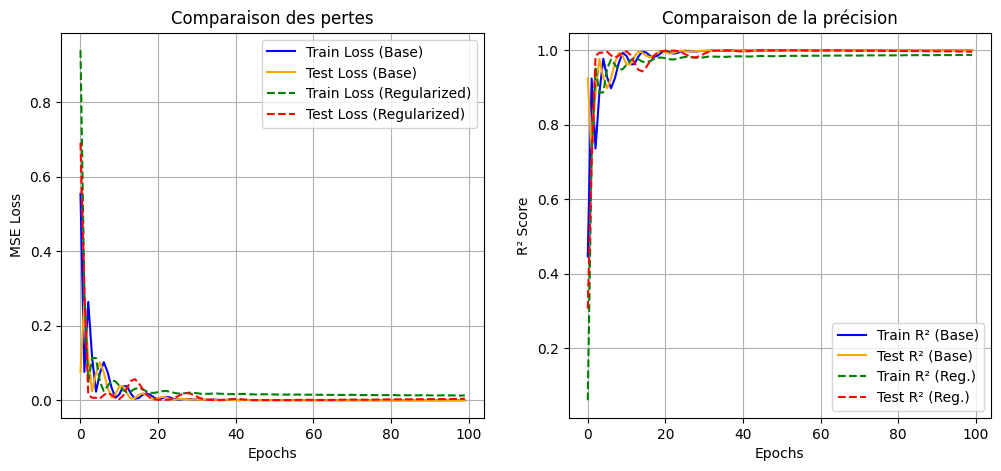

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# --- Loss ---
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss (Base)', color='blue')
plt.plot(test_losses, label='Test Loss (Base)', color='orange')
plt.plot(train_losses_reg, '--', label='Train Loss (Regularized)', color='green')
plt.plot(test_losses_reg, '--', label='Test Loss (Regularized)', color='red')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Comparaison des pertes')
plt.legend()
plt.grid(True)

# --- R² ---
plt.subplot(1,2,2)
plt.plot(train_r2, label='Train R² (Base)', color='blue')
plt.plot(test_r2, label='Test R² (Base)', color='orange')
plt.plot(train_r2_reg, '--', label='Train R² (Reg.)', color='green')
plt.plot(test_r2_reg, '--', label='Test R² (Reg.)', color='red')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('Comparaison de la précision')
plt.legend()
plt.grid(True)

plt.show()


In [33]:
from google.colab import files

# Sélectionne et importe plusieurs fichiers à la fois
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [34]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("predictive_maintenance.csv")  # ou ai4i2020.csv selon ton fichier
print(df.shape)
df.head()

(10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [35]:
# Vérifier les valeurs manquantes et les doublons
print("Valeurs manquantes par colonne :")
print(df.isna().sum())
print("\nNombre de doublons :", df.duplicated().sum())

# Supprimer les colonnes inutiles pour la prédiction du Failure Type
df = df.drop(columns=['UDI', 'Product ID', 'Target'], errors='ignore')

# Nettoyer les chaînes
df['Failure Type'] = df['Failure Type'].astype(str).str.strip()

df.head()


Valeurs manquantes par colonne :
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Nombre de doublons : 0


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [36]:
# Séparer X et y
X = df.drop(columns=['Failure Type'])
y = df['Failure Type']

print("Dimensions de X :", X.shape)
print("Distribution des classes dans y :")
print(y.value_counts())


Dimensions de X : (10000, 6)
Distribution des classes dans y :
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ['Type']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# OneHotEncoder + conservation des colonnes numériques
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', 'passthrough', num_cols)
])

X_encoded = preprocess.fit_transform(X)
print("Shape après encodage :", X_encoded.shape)


Shape après encodage : (10000, 7)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

import numpy as np
X_scaled = np.array(X_scaled)  # conversion en numpy array


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train :", X_train.shape, " | Test :", X_test.shape)


Train : (8000, 7)  | Test : (2000, 7)


/tmp/ipython-input-3634326956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Failure Type', order=df['Failure Type'].value_counts().index, palette='viridis')


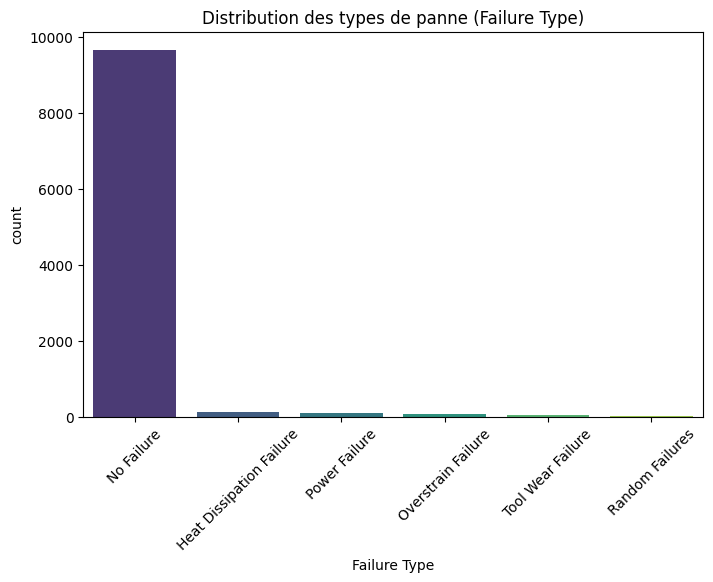

In [41]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Failure Type', order=df['Failure Type'].value_counts().index, palette='viridis')
plt.title("Distribution des types de panne (Failure Type)")
plt.xticks(rotation=45)
plt.show()


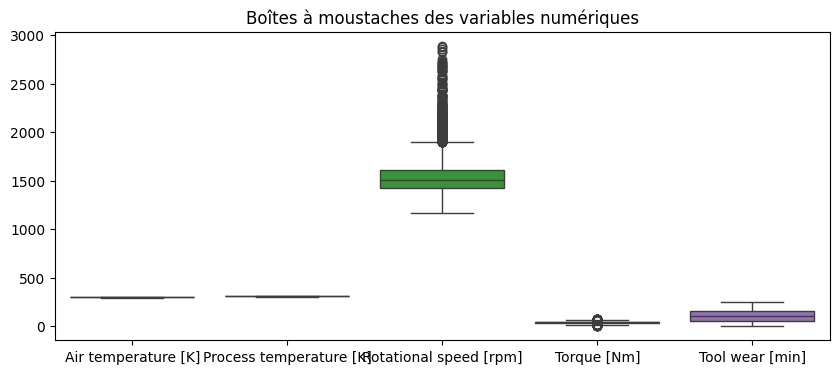

In [42]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df.select_dtypes('number'))
plt.title("Boîtes à moustaches des variables numériques")
plt.show()


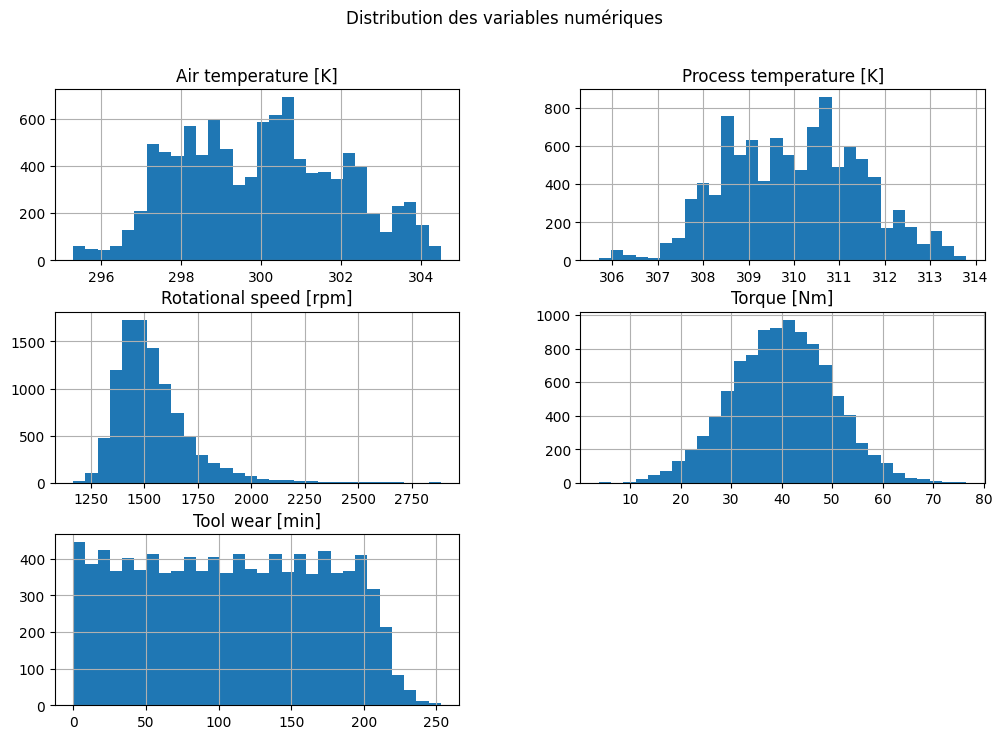

In [43]:
num_cols = ['Air temperature [K]', 'Process temperature [K]',
             'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

df[num_cols].hist(bins=30, figsize=(12,8), color='#1f77b4')
plt.suptitle("Distribution des variables numériques")
plt.show()


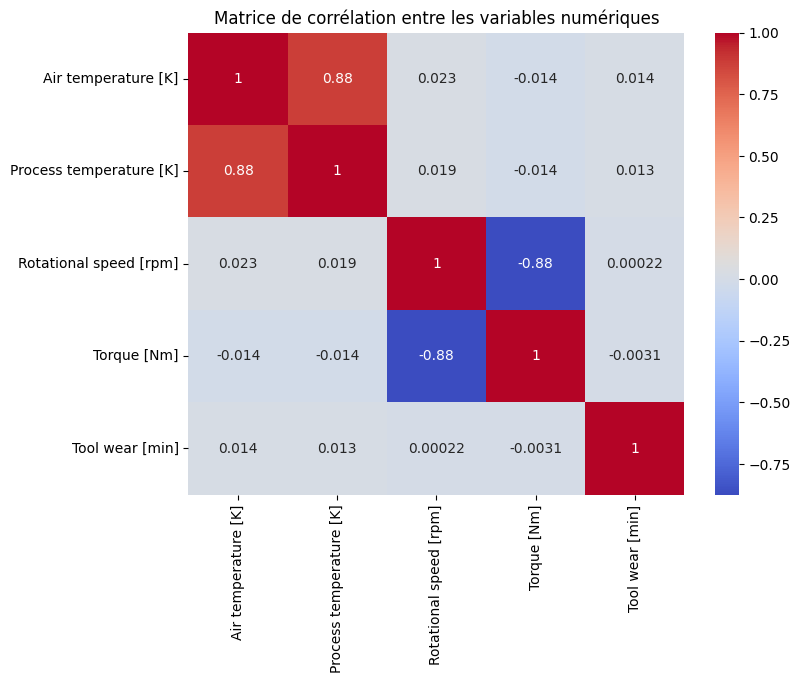

In [44]:
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


/tmp/ipython-input-1152825760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y='Torque [Nm]', palette='Set2')


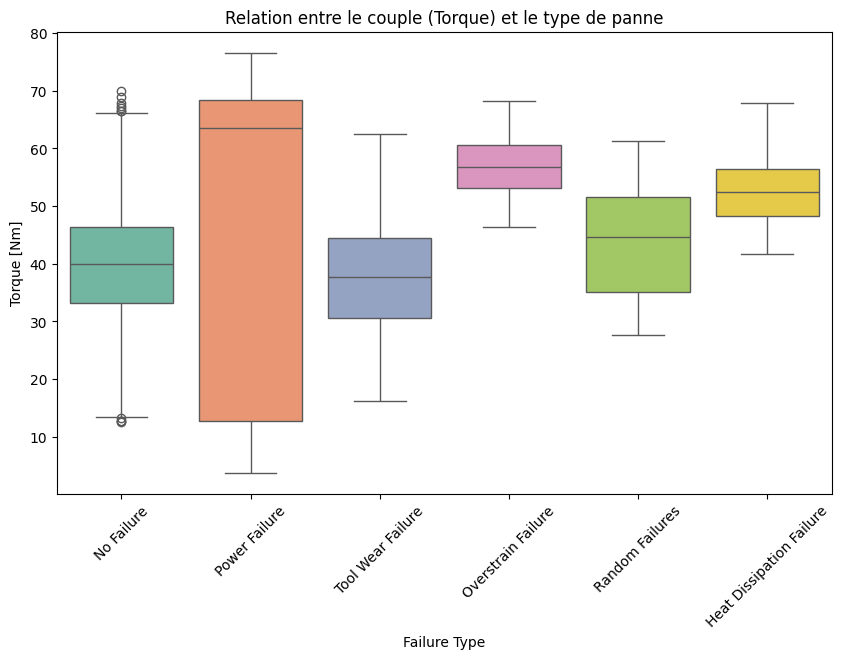

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Failure Type', y='Torque [Nm]', palette='Set2')
plt.title("Relation entre le couple (Torque) et le type de panne")
plt.xticks(rotation=45)
plt.show()


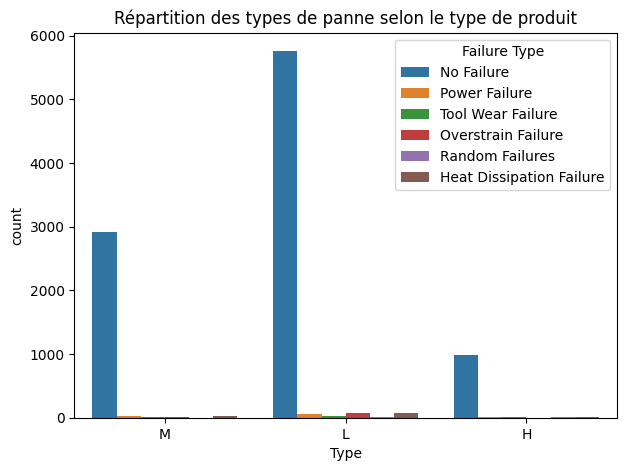

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Type', hue='Failure Type', palette='tab10')
plt.title("Répartition des types de panne selon le type de produit")
plt.show()


In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes encodées :")
for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")


Classes encodées :
0 → Heat Dissipation Failure
1 → No Failure
2 → Overstrain Failure
3 → Power Failure
4 → Random Failures
5 → Tool Wear Failure


In [48]:
from imblearn.over_sampling import SMOTE

# Initialisation du SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

# Application du sur-échantillonnage
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)

print("Forme initiale :", X_scaled.shape, "| Forme après SMOTE :", X_resampled.shape)


Forme initiale : (10000, 7) | Forme après SMOTE : (57912, 7)


/tmp/ipython-input-49293366.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette='viridis')


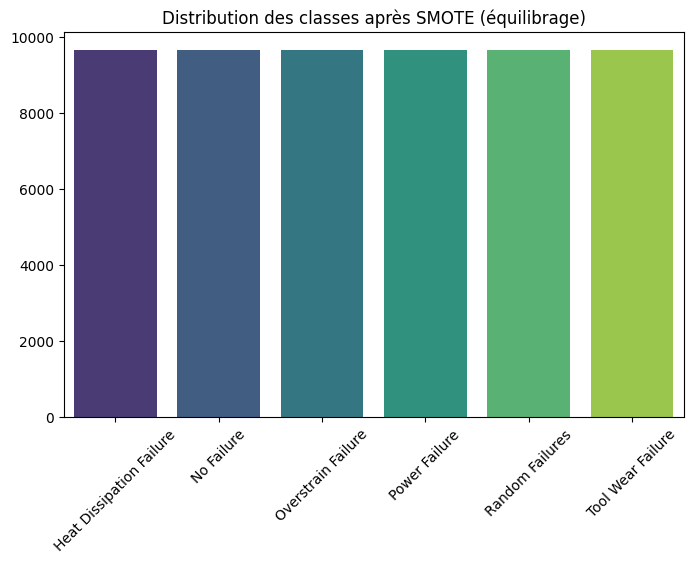

Répartition après équilibrage :
Heat Dissipation Failure → 9652
No Failure → 9652
Overstrain Failure → 9652
Power Failure → 9652
Random Failures → 9652
Tool Wear Failure → 9652


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

unique, counts = np.unique(y_resampled, return_counts=True)
class_distribution = dict(zip(le.inverse_transform(unique), counts))

plt.figure(figsize=(8,5))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()), palette='viridis')
plt.title("Distribution des classes après SMOTE (équilibrage)")
plt.xticks(rotation=45)
plt.show()

print("Répartition après équilibrage :")
for cls, count in class_distribution.items():
    print(f"{cls} → {count}")


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Train :", X_train.shape, "| Test :", X_test.shape)


Train : (46329, 7) | Test : (11583, 7)


In [51]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# numpy -> torch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.long)

# datasets & loaders
train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)

BATCH_SIZE = 512
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, drop_last=False)


cpu


In [52]:
import torch.nn as nn
import torch.nn.functional as F

INPUT_DIM  = X_train.shape[1]   # 7
N_CLASSES  = len(set(y_train))  # 6

class MLPClassifier(nn.Module):
    def __init__(self, in_dim=INPUT_DIM, n_classes=N_CLASSES):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, n_classes)   # logits
        )
        # initialisation He
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.net(x)

model = MLPClassifier().to(device)
print(model)


MLPClassifier(
  (net): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): Linear(in_features=32, out_features=6, bias=True)
  )
)


In [53]:
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np

EPOCHS = 30
LR     = 1e-3

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=EPOCHS)

train_losses, test_losses = [], []
train_accs,   test_accs   = [], []

def accuracy_from_logits(logits, y_true):
    preds = logits.argmax(dim=1)
    return (preds == y_true).float().mean().item()

for epoch in range(1, EPOCHS+1):
    # --- train ---
    model.train()
    running_loss, running_acc, n = 0.0, 0.0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        running_acc  += (logits.argmax(1) == yb).float().sum().item()
        n += xb.size(0)

    tr_loss = running_loss / n
    tr_acc  = running_acc  / n

    # --- eval ---
    model.eval()
    test_loss, test_acc, m = 0.0, 0.0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            test_loss += loss.item() * xb.size(0)
            test_acc  += (logits.argmax(1) == yb).float().sum().item()
            m += xb.size(0)

    te_loss = test_loss / m
    te_acc  = test_acc  / m

    scheduler.step()

    train_losses.append(tr_loss); test_losses.append(te_loss)
    train_accs.append(tr_acc);    test_accs.append(te_acc)

    print(f"Epoch {epoch:02d}/{EPOCHS} | "
          f"train loss {tr_loss:.4f} acc {tr_acc:.4f} | "
          f"test loss {te_loss:.4f} acc {te_acc:.4f}")


Epoch 01/30 | train loss 1.0379 acc 0.6532 | test loss 0.4471 acc 0.8560
Epoch 02/30 | train loss 0.4634 acc 0.8355 | test loss 0.2675 acc 0.9129
Epoch 03/30 | train loss 0.3517 acc 0.8740 | test loss 0.2111 acc 0.9290
Epoch 04/30 | train loss 0.3005 acc 0.8939 | test loss 0.1822 acc 0.9376
Epoch 05/30 | train loss 0.2587 acc 0.9097 | test loss 0.1580 acc 0.9485
Epoch 06/30 | train loss 0.2371 acc 0.9183 | test loss 0.1482 acc 0.9488
Epoch 07/30 | train loss 0.2167 acc 0.9253 | test loss 0.1369 acc 0.9531
Epoch 08/30 | train loss 0.1975 acc 0.9329 | test loss 0.1241 acc 0.9583
Epoch 09/30 | train loss 0.1856 acc 0.9373 | test loss 0.1160 acc 0.9611
Epoch 10/30 | train loss 0.1769 acc 0.9418 | test loss 0.1123 acc 0.9622
Epoch 11/30 | train loss 0.1690 acc 0.9446 | test loss 0.1091 acc 0.9634
Epoch 12/30 | train loss 0.1597 acc 0.9482 | test loss 0.1021 acc 0.9659
Epoch 13/30 | train loss 0.1557 acc 0.9494 | test loss 0.1002 acc 0.9668
Epoch 14/30 | train loss 0.1486 acc 0.9512 | test l

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# prédictions sur l'ensemble test
model.eval()
all_logits, all_y = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        all_logits.append(logits.cpu())
        all_y.append(yb)
logits = torch.cat(all_logits, dim=0)
y_true = torch.cat(all_y, dim=0)
y_pred = logits.argmax(1)

print(classification_report(y_true.numpy(), y_pred.numpy(),
                            target_names=le.classes_))

cm = confusion_matrix(y_true.numpy(), y_pred.numpy())
cm


                          precision    recall  f1-score   support

Heat Dissipation Failure       0.98      1.00      0.99      1930
              No Failure       1.00      0.84      0.91      1930
      Overstrain Failure       0.99      1.00      1.00      1931
           Power Failure       0.98      1.00      0.99      1931
         Random Failures       0.95      1.00      0.98      1931
       Tool Wear Failure       0.94      1.00      0.97      1930

                accuracy                           0.97     11583
               macro avg       0.97      0.97      0.97     11583
            weighted avg       0.97      0.97      0.97     11583



array([[1925,    0,    0,    5,    0,    0],
       [  35, 1623,   17,   29,   95,  131],
       [   0,    0, 1931,    0,    0,    0],
       [   0,    0,    0, 1931,    0,    0],
       [   0,    0,    0,    0, 1931,    0],
       [   0,    0,    0,    0,    1, 1929]])

In [55]:
!pip install skorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 4.4 MB/s eta 0:00:00


In [56]:
from skorch import NeuralNetClassifier
import torch.nn as nn
import torch.nn.functional as F

# même modèle qu'avant, mais paramétrable
class MLPClassifier(nn.Module):
    def __init__(self, input_dim=7, hidden1=128, hidden2=64, hidden3=32, dropout=0.2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden1)
        self.bn1 = nn.BatchNorm1d(hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.bn2 = nn.BatchNorm1d(hidden2)
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.fc4 = nn.Linear(hidden3, 6)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        x = F.relu(self.fc3(x))
        return self.fc4(x)


In [57]:
from skorch import NeuralNetClassifier
import torch.optim as optim

net = NeuralNetClassifier(
    MLPClassifier,
    max_epochs=20,
    lr=0.001,
    batch_size=512,
    optimizer=optim.Adam,
    criterion=nn.CrossEntropyLoss,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'lr': [0.001, 0.0005],
    'max_epochs': [20, 30],
    'batch_size': [512],
    'module__hidden1': [128],
    'module__hidden2': [64],
    'module__hidden3': [32],
    'optimizer': [optim.Adam, optim.RMSprop],
    'module__dropout': [0.2]
}

grid = GridSearchCV(
    estimator=net,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train.astype('float32'), y_train.astype('int64'))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.9988       0.8786        0.4017  0.8508
      2        0.3028       0.9409        0.1990  1.0429
      3        0.1965       0.9589        0.1365  1.0888
      4        0.1507       0.9674        0.1067  1.1778
      5        0.1286       0.9724        0.0880  0.8250
      6        0.1141       0.9760        0.0779  0.8347
      7        0.1019       0.9781        0.0702  0.8434
      8        0.0979       0.9807        0.0631  0.8163
      9        0.0888       0.9819        0.0574  0.8028
     10        0.0850       0.9837        0.0552  0.8046
     11        0.0793       0.9846        0.0529  0.7129
     12        0.0779       0.9835        0.0510  0.7471
     13        0.0745       0.9845        0.0489  0.8038
     14        0.0704       0.9855        0.0472  0.8100
     15        0.0686       

GridSearchCV(cv=3,
             estimator=NeuralNetClassifier(_params_to_validate=set(), batch_size=512, callbacks=None, compile=False, criterion=<class 'torch.nn.modules.loss.CrossEntropyLoss'>, dataset=<class 'skorch.dataset.Dataset'>, device='cpu', iterator_train=<class 'torch.utils.data.dataloader.DataLoader'>, iterator_valid=<class 'torch.utils.data.dataloader.DataLoad...ad_kwargs=None, use_caching='auto', verbose=1, warm_start=False),
             n_jobs=-1,
             param_grid={'batch_size': [512], 'lr': [0.001, 0.0005],
                         'max_epochs': [20, 30], 'module__dropout': [0.2],
                         'module__hidden1': [128], 'module__hidden2': [64],
                         'module__hidden3': [32],
                         'optimizer': [<class 'torch.optim.adam.Adam'>,
                                       <class 'torch.optim.rmsprop.RMSprop'>]},
             scoring='accuracy', verbose=2)

In [60]:
print("✅ Best Parameters : ", grid.best_params_)
print("🎯 Best Cross-Val Accuracy : ", grid.best_score_)


✅ Best Parameters :  {'batch_size': 512, 'lr': 0.001, 'max_epochs': 30, 'module__dropout': 0.2, 'module__hidden1': 128, 'module__hidden2': 64, 'module__hidden3': 32, 'optimizer': <class 'torch.optim.adam.Adam'>}
🎯 Best Cross-Val Accuracy :  0.9858835718448488


In [65]:
best_net = grid.best_estimator_
history = best_net.history


In [66]:
print(history[-1])   # affiche la dernière époque (devrait contenir train_loss, valid_loss, valid_acc)


{'batches': [{'train_loss': 0.1806921809911728, 'train_batch_size': 512}, {'train_loss': 0.057334206998348236, 'train_batch_size': 512}, {'train_loss': 0.04874547943472862, 'train_batch_size': 512}, {'train_loss': 0.08921518921852112, 'train_batch_size': 512}, {'train_loss': 0.03988656774163246, 'train_batch_size': 512}, {'train_loss': 0.06303364038467407, 'train_batch_size': 512}, {'train_loss': 0.06709427386522293, 'train_batch_size': 512}, {'train_loss': 0.039748210459947586, 'train_batch_size': 512}, {'train_loss': 0.043657805770635605, 'train_batch_size': 512}, {'train_loss': 0.07081344723701477, 'train_batch_size': 512}, {'train_loss': 0.0319453626871109, 'train_batch_size': 512}, {'train_loss': 0.07469701766967773, 'train_batch_size': 512}, {'train_loss': 0.045272212475538254, 'train_batch_size': 512}, {'train_loss': 0.057808153331279755, 'train_batch_size': 512}, {'train_loss': 0.05571306496858597, 'train_batch_size': 512}, {'train_loss': 0.043709997087717056, 'train_batch_size

In [67]:
train_losses = [row['train_loss'] for row in history]
valid_losses = [row['valid_loss'] for row in history]
valid_accuracies = [row['valid_acc'] for row in history]


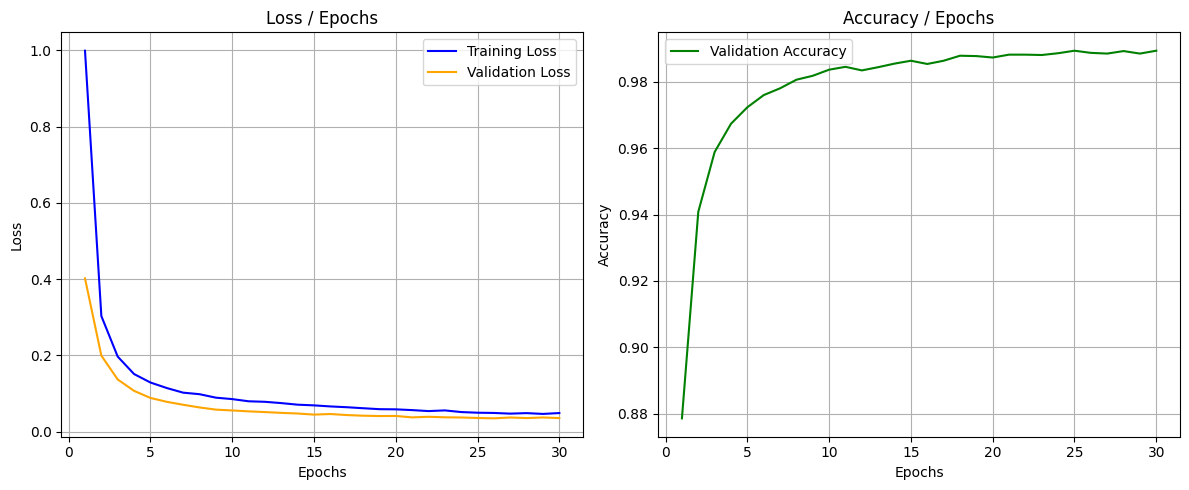

In [68]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

# --- Courbe de la perte ---
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue')
plt.plot(epochs, valid_losses, label='Validation Loss', color='orange')
plt.title('Loss / Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# --- Courbe de la précision ---
plt.subplot(1, 2, 2)
plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='green')
plt.title('Accuracy / Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Récupérer le meilleur modèle du GridSearch
best_net = grid.best_estimator_

# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = best_net.predict(X_train.astype('float32'))
y_pred_test = best_net.predict(X_test.astype('float32'))


In [70]:
# === Sur le TRAIN ===
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='macro')
train_recall = recall_score(y_train, y_pred_train, average='macro')   # Sensitivity
train_f1 = f1_score(y_train, y_pred_train, average='macro')

# === Sur le TEST ===
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')      # Sensitivity
test_f1 = f1_score(y_test, y_pred_test, average='macro')

print("=== TRAIN METRICS ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Sensitivity (Recall): {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

print("\n=== TEST METRICS ===")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Sensitivity (Recall): {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")


=== TRAIN METRICS ===
Accuracy: 0.9907
Precision: 0.9909
Sensitivity (Recall): 0.9907
F1-Score: 0.9906

=== TEST METRICS ===
Accuracy: 0.9882
Precision: 0.9884
Sensitivity (Recall): 0.9882
F1-Score: 0.9880



=== Classification Report (Test Set) ===
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.99      1.00      1.00      1930
              No Failure       1.00      0.93      0.96      1930
      Overstrain Failure       1.00      1.00      1.00      1931
           Power Failure       0.99      1.00      0.99      1931
         Random Failures       0.98      1.00      0.99      1931
       Tool Wear Failure       0.97      1.00      0.98      1930

                accuracy                           0.99     11583
               macro avg       0.99      0.99      0.99     11583
            weighted avg       0.99      0.99      0.99     11583



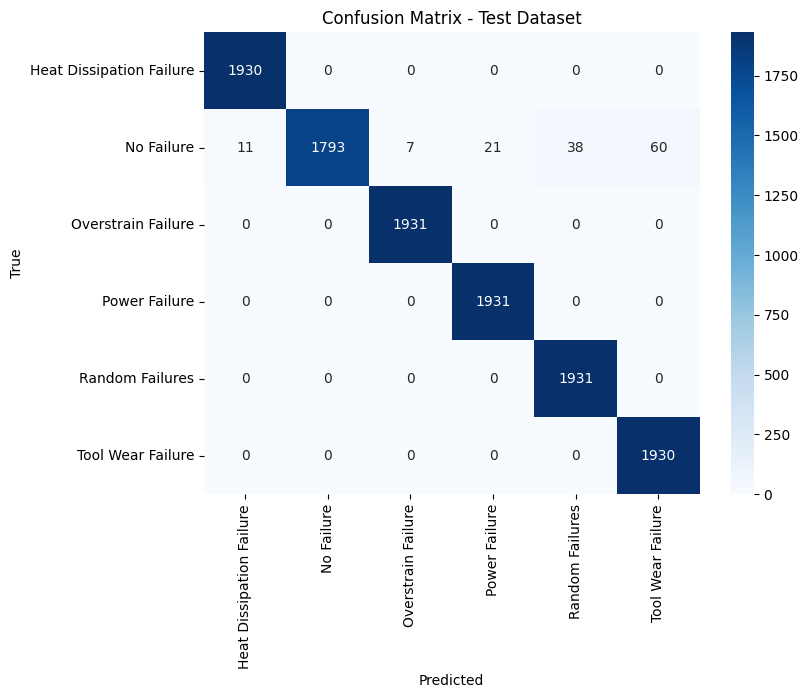

In [72]:
# Rapport détaillé
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test, target_names=le.classes_))

# Matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Dataset')
plt.show()


In [76]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# ===========================
# 1. Hyperparameters
# ===========================
INPUT_SIZE = 7
H1, H2, H3 = 128, 64, 32
DROPOUT = 0.3
LR = 0.001
BATCH_SIZE = 256
EPOCHS = 30
WEIGHT_DECAY = 1e-4
LABEL_SMOOTH = 0.1

# ===========================
# 2. Model with Regularization
# ===========================
class RegularizedMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(INPUT_SIZE, H1),
            nn.BatchNorm1d(H1),
            nn.ReLU(),
            nn.Dropout(DROPOUT),

            nn.Linear(H1, H2),
            nn.BatchNorm1d(H2),
            nn.ReLU(),
            nn.Dropout(DROPOUT),

            nn.Linear(H2, H3),
            nn.BatchNorm1d(H3),
            nn.ReLU(),

            nn.Linear(H3, 6)
        )

    def forward(self, x):
        return self.net(x)

model = RegularizedMLP()

# ===========================
# 3. Loss + Optimizer + Scheduler
# ===========================
criterion = nn.CrossEntropyLoss(label_smoothing=LABEL_SMOOTH)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=LR,
    weight_decay=WEIGHT_DECAY
)

scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2
)

# ===========================
# 4. DataLoader (Correction ici!)
# ===========================
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)

X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE)

# ===========================
# 5. Training Loop
# ===========================
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    correct = 0

    for Xb, yb in train_loader:
        preds = model(Xb)
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        correct += (preds.argmax(1) == yb).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    train_accuracy = correct / len(X_train)

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0

    with torch.no_grad():
        for Xb, yb in test_loader:
            preds = model(Xb)
            loss = criterion(preds, yb)
            val_loss += loss.item()
            val_correct += (preds.argmax(1) == yb).sum().item()

    avg_val_loss = val_loss / len(test_loader)
    val_accuracy = val_correct / len(X_test)

    # Scheduler update
    scheduler.step(avg_val_loss)

    # Save History
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f} Acc: {train_accuracy:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} Acc: {val_accuracy:.4f}")


Epoch 1/30 | Train Loss: 0.9753 Acc: 0.7710 | Val Loss: 0.6476 Acc: 0.8960
Epoch 2/30 | Train Loss: 0.6961 Acc: 0.8798 | Val Loss: 0.5888 Acc: 0.9293
Epoch 3/30 | Train Loss: 0.6505 Acc: 0.9032 | Val Loss: 0.5638 Acc: 0.9459
Epoch 4/30 | Train Loss: 0.6200 Acc: 0.9175 | Val Loss: 0.5429 Acc: 0.9539
Epoch 5/30 | Train Loss: 0.5994 Acc: 0.9277 | Val Loss: 0.5331 Acc: 0.9543
Epoch 6/30 | Train Loss: 0.5840 Acc: 0.9362 | Val Loss: 0.5185 Acc: 0.9624
Epoch 7/30 | Train Loss: 0.5723 Acc: 0.9406 | Val Loss: 0.5172 Acc: 0.9612
Epoch 8/30 | Train Loss: 0.5610 Acc: 0.9456 | Val Loss: 0.5047 Acc: 0.9668
Epoch 9/30 | Train Loss: 0.5531 Acc: 0.9509 | Val Loss: 0.4990 Acc: 0.9696
Epoch 10/30 | Train Loss: 0.5486 Acc: 0.9509 | Val Loss: 0.4931 Acc: 0.9723
Epoch 11/30 | Train Loss: 0.5430 Acc: 0.9537 | Val Loss: 0.4941 Acc: 0.9715
Epoch 12/30 | Train Loss: 0.5383 Acc: 0.9556 | Val Loss: 0.4900 Acc: 0.9732
Epoch 13/30 | Train Loss: 0.5324 Acc: 0.9588 | Val Loss: 0.4877 Acc: 0.9723
Epoch 14/30 | Train L